# 로지스틱 회귀
- 의의
    - 확률을 예측하는데에 사용되는 통계 모델
        - 특정 결과의 확률을 계산
          
    - 결과값은 이진(둘중하나가 정답)
        - 원하는 값 1, 아닌거 0
     
    - 선형 회귀와 마찬가지로 다중 공선성은 거의 없어야 함
        - 독립변수는 서로 독립적이어야 함
    
    - 종속변수와 관련 없는 독립변수를 제거할 때 더 효율적인 경향이 있음
 
- 장점
    - 많은 양의 연산 자원 필요없음
    - 쉽게 해석 가능
- 단점
    - 비선형 데이터에 사용하기 힘듦
    - 과적합에 취약함
    - 1과 0으로만 결과가 출력되기 대문에 범주형 결과를 예측하는데에만 사용가능

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression # 로지스틱
from sklearn.metrics import roc_curve, roc_auc_score # 모델 평가 기준(이진모델분류에서 많이 사용)
from scipy.special import expit, softmax # 내부적인 연산과정을 보여주고 싶어서(수업과정에서만 씀)

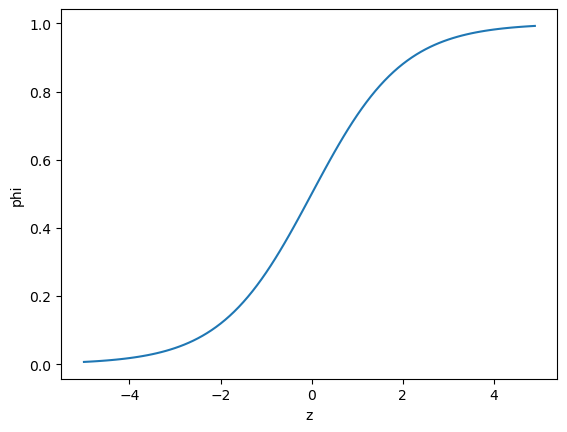

In [3]:
# 로지스틱 함수 시각화
z = np.arange(-5, 5, 0.1)
phi = 1 / ( 1 + np.exp(-z) ) # 로지스틱 함수식

plt.plot(z, phi)
plt.xlabel("z")
plt.ylabel("phi")
plt.show()

## 데이터 준비 

In [5]:
df = pd.read_csv("./data/Fish.csv")

In [6]:
# 도미, 빙어 데이터 필터링
df_bs = df.loc[df["Species"].isin(["Bream","Smelt"])]

In [7]:
df_bs.shape

(49, 7)

In [9]:
# 다중공선성때문에
df_bs = df_bs.drop("Length1",axis=1)

In [10]:
x = df_bs.drop("Species", axis = 1)
y = df_bs["Species"]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.25,
    stratify = y,
    random_state = 32
)

In [13]:
ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.fit_transform(x_test)

# 모델훈련

In [14]:
logi = LogisticRegression()

In [15]:
logi.fit(scaled_train, y_train) # y_train 은 범주형이지만 이거 

LogisticRegression()

In [17]:
logi.predict(scaled_test)

array(['Bream', 'Bream', 'Smelt', 'Bream', 'Smelt', 'Smelt', 'Bream',
       'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [18]:
# 예측확률 출력
logi.predict_proba(scaled_test)

array([[9.93147351e-01, 6.85264904e-03],
       [9.97978021e-01, 2.02197853e-03],
       [1.18585932e-01, 8.81414068e-01],
       [9.99455658e-01, 5.44341642e-04],
       [5.19882748e-02, 9.48011725e-01],
       [6.34065886e-02, 9.36593411e-01],
       [9.96804394e-01, 3.19560632e-03],
       [3.72045908e-02, 9.62795409e-01],
       [9.95833043e-01, 4.16695652e-03],
       [9.96149228e-01, 3.85077162e-03],
       [9.75060989e-01, 2.49390106e-02],
       [9.56287047e-01, 4.37129529e-02],
       [9.67265534e-01, 3.27344656e-02]])

In [19]:
# 종속변수 값확인
logi.classes_

array(['Bream', 'Smelt'], dtype=object)

# 로지스틱 회귀식

In [20]:
logi.coef_, logi.intercept_

(array([[-0.5596683 , -0.77372812, -0.80792618, -0.84819761, -0.80625814]]),
 array([-2.67309837]))

In [21]:
x_train.columns

Index(['Weight', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

- z = Weight * -0.55 + Lengh2 * -0.77 + Length3 * -0.8 + Height * -0.84 + Width * -0.8 - 2.67

## 회귀식을 통한 확률값 계산

In [22]:
scaled_test[0]

array([0.60412645, 0.60717075, 0.61439578, 0.52145449, 0.69030867])

In [23]:
z = 0.60 * -0.55 + 0.60 * -0.77 + 0.61 * -0.8 + 0.52 * -0.84 + 0.69 * -0.8 - 2.67

In [24]:
z 

-4.9388000000000005

In [25]:
phi = 1 / ( 1 + np.exp(-z) )

In [28]:
phi # 빙어일 확률임 # 왜 빙어임?

np.float64(0.007112242704714543)

In [29]:
# z값 계산
decision_z = logi.decision_function(scaled_test)
decision_z

array([-4.97624374, -6.20165475,  2.00588965, -7.515389  ,  2.90334866,
        2.69268148, -5.74277771,  3.25340878, -5.4763937 , -5.55562353,
       -3.66606676, -3.08541366, -3.38604454])

In [30]:
# z값을 시그모이드 함수를 통과시켜
expit(decision_z)

array([6.85264904e-03, 2.02197853e-03, 8.81414068e-01, 5.44341642e-04,
       9.48011725e-01, 9.36593411e-01, 3.19560632e-03, 9.62795409e-01,
       4.16695652e-03, 3.85077162e-03, 2.49390106e-02, 4.37129529e-02,
       3.27344656e-02])

In [31]:
# 모두~~~~~~~빙어일확률

## 모델 평가

In [33]:
logi.score(scaled_test, y_test) # 의심하지 말어라 

1.0

# roc 커브

In [45]:
predict_proba_test = logi.predict_proba(scaled_test)
predict_proba_test

array([[9.99712205e-01, 2.87794723e-04],
       [2.19028095e-02, 9.78097191e-01],
       [2.58079888e-01, 7.41920112e-01],
       [6.42450630e-01, 3.57549370e-01],
       [9.90052977e-01, 9.94702324e-03],
       [8.20548405e-01, 1.79451595e-01],
       [7.50635628e-01, 2.49364372e-01],
       [9.79039787e-01, 2.09602128e-02],
       [9.59821244e-01, 4.01787562e-02],
       [9.98746461e-01, 1.25353889e-03],
       [9.70436216e-01, 2.95637837e-02],
       [9.94872441e-01, 5.12755918e-03],
       [9.97394006e-01, 2.60599425e-03],
       [9.97202218e-01, 2.79778250e-03],
       [9.21812846e-01, 7.81871545e-02],
       [9.90451822e-01, 9.54817789e-03],
       [2.66756515e-02, 9.73324348e-01],
       [1.48562389e-02, 9.85143761e-01],
       [8.64463967e-01, 1.35536033e-01],
       [9.94136619e-01, 5.86338114e-03],
       [3.94699982e-01, 6.05300018e-01],
       [9.97573311e-01, 2.42668867e-03],
       [9.98564079e-01, 1.43592142e-03],
       [9.97943764e-01, 2.05623596e-03],
       [9.950643

In [34]:
# roc 커브
pred_proba_class1 = logi.predict_proba(scaled_test)[:, 1]
pred_proba_class1

array([6.85264904e-03, 2.02197853e-03, 8.81414068e-01, 5.44341642e-04,
       9.48011725e-01, 9.36593411e-01, 3.19560632e-03, 9.62795409e-01,
       4.16695652e-03, 3.85077162e-03, 2.49390106e-02, 4.37129529e-02,
       3.27344656e-02])

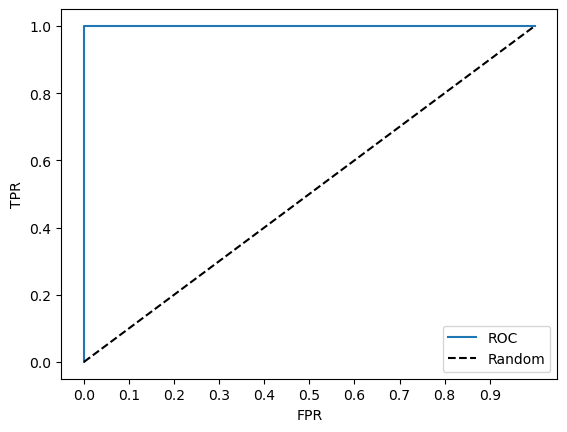

In [38]:
fprs, tprs, thresholds = roc_curve(y_test.map(lambda x : 0 if x =="Bream" else 1) , pred_proba_class1)

plt.figure()
plt.plot(fprs,tprs, label="ROC")

plt.plot([0, 1], [0,1], "k--", label="Random")

plt.xticks(np.round(np.arange(0,1,0.1),2))
plt.xlabel("FPR")
plt.ylabel("TPR")


plt.legend()
plt.show()

In [46]:
print(fprs, tprs, thresholds)

# fprs = False Positive Rate => 
# tprs = True Positive Rate
# thresholds => 

[0. 0. 0. 1.] [0.   0.25 1.   1.  ] [           inf 9.62795409e-01 8.81414068e-01 5.44341642e-04]


In [39]:
roc_auc_score(y_test, pred_proba_class1)

np.float64(1.0)

# 로지스틱 회귀로 다중 분류

In [40]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [41]:
# 변수 선택
df = df.drop("Length1", axis = 1)

df.head()

,Species,Weight,Length2,Length3,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [42]:
x = df.drop("Species", axis = 1)
y = df["Species"]

In [43]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.25,
    stratify= y,
    random_state =32
)

ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.fit_transform(x_test)

In [48]:
logi = LogisticRegression()
logi.fit(scaled_train, y_train)
print(logi.score(scaled_train, y_train))
print(logi.score(scaled_test, y_test))

0.7899159663865546
0.875


In [49]:
logi.predict(scaled_test)

array(['Bream', 'Smelt', 'Perch', 'Perch', 'Pike', 'Perch', 'Perch',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Pike', 'Pike', 'Smelt', 'Smelt', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Bream', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Parkki', 'Parkki', 'Smelt', 'Parkki', 'Pike', 'Roach',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch'], dtype=object)

In [50]:
# 예측확률값 확인
proba = logi.predict_proba(scaled_test)
print(np.round(proba, decimals = 3))

[[0.98  0.003 0.002 0.001 0.001 0.    0.013]
 [0.    0.022 0.098 0.    0.041 0.837 0.001]
 [0.005 0.127 0.41  0.01  0.297 0.138 0.014]
 [0.02  0.103 0.55  0.022 0.253 0.019 0.034]
 [0.003 0.    0.04  0.934 0.011 0.    0.012]
 [0.033 0.066 0.537 0.054 0.253 0.006 0.051]
 [0.017 0.053 0.6   0.036 0.246 0.009 0.039]
 [0.737 0.123 0.033 0.009 0.054 0.    0.044]
 [0.627 0.19  0.038 0.015 0.087 0.    0.043]
 [0.95  0.012 0.007 0.002 0.003 0.    0.025]
 [0.642 0.143 0.048 0.022 0.091 0.    0.054]
 [0.823 0.038 0.042 0.011 0.025 0.    0.061]
 [0.896 0.021 0.02  0.006 0.013 0.    0.044]
 [0.944 0.022 0.005 0.004 0.006 0.    0.02 ]
 [0.007 0.005 0.318 0.509 0.125 0.002 0.035]
 [0.01  0.001 0.117 0.816 0.025 0.    0.031]
 [0.    0.023 0.123 0.001 0.051 0.802 0.001]
 [0.    0.016 0.067 0.    0.026 0.891 0.   ]
 [0.017 0.028 0.69  0.04  0.176 0.003 0.046]
 [0.064 0.005 0.712 0.059 0.044 0.    0.116]
 [0.004 0.061 0.611 0.01  0.253 0.044 0.017]
 [0.082 0.003 0.653 0.096 0.027 0.    0.14 ]
 [0.065 0.

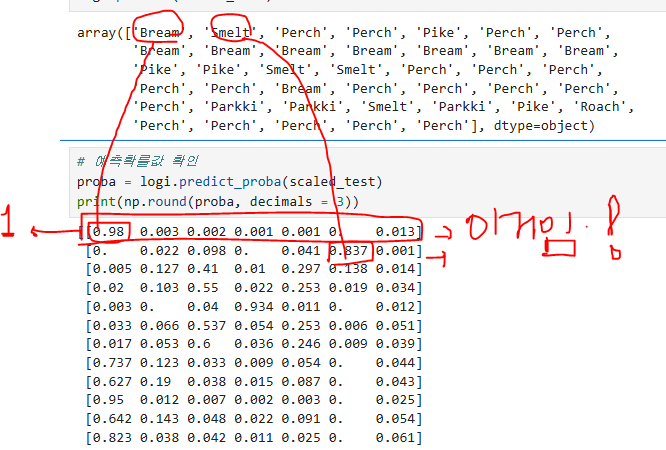

In [52]:
# 저 확률의 대한 종속변수가 뭐냐~~~
logi.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [53]:
# 회귀식 확인
logi.coef_

array([[-0.18317726, -0.06470206,  0.67497145,  2.88327468, -0.26593272],
       [-0.4083156 , -0.64807707, -0.64304831,  1.85732242, -0.83610545],
       [ 1.19257904,  0.17647128, -1.42893482, -1.90914037,  1.85521624],
       [-0.03267694,  1.72834896,  1.67136326, -1.13862485, -0.65124909],
       [-0.67943489, -0.54994907,  0.2826998 , -0.35176248,  0.5946832 ],
       [-0.3814615 , -0.724368  , -0.70463797, -1.3794718 , -1.63600284],
       [ 0.49248715,  0.08227596,  0.1475866 ,  0.0384024 ,  0.93939065]])

In [54]:
logi.intercept_

array([ 0.38217216, -0.01860811,  2.13586324, -0.04409393,  1.00095738,
       -3.77356087,  0.31727012])

- 현재의 로지스틱 다중분류에서 독립변수는 5개를 사용하기 때문에 coef_ 배열의 열은 5개임

- 종속변수의 범주 수가 7개이기 때문에 coef_ 배열의 행과 intercept_ 의 행은 7개임

- 즉, 로지스틱 다중 분류는 각 클래스 마다 z값을 계산한다

- 이때 확률값은 z값의 합 1이 될수있도록 소프트맥스 함수를 사용한다

# 회귀식을 통한 확률값 계산

In [55]:
decision_z = logi.decision_function(scaled_test[:5])
np.round(decision_z, decimals = 2)

array([[  6.89,   1.03,   0.53,   0.34,  -0.35, -11.  ,   2.57],
       [ -4.96,   1.12,   2.61,  -2.68,   1.74,   4.75,  -2.57],
       [ -2.37,   0.85,   2.02,  -1.74,   1.7 ,   0.93,  -1.39],
       [ -1.17,   0.49,   2.17,  -1.07,   1.39,  -1.19,  -0.63],
       [ -0.53,  -3.07,   2.06,   5.21,   0.76,  -5.28,   0.84]])

In [56]:
proba = softmax(decision_z, axis = 1) # 각 행에 대해서 소프트맥스 값 계산

In [57]:
np.round(proba, decimals = 2)

array([[0.98, 0.  , 0.  , 0.  , 0.  , 0.  , 0.01],
       [0.  , 0.02, 0.1 , 0.  , 0.04, 0.84, 0.  ],
       [0.01, 0.13, 0.41, 0.01, 0.3 , 0.14, 0.01],
       [0.02, 0.1 , 0.55, 0.02, 0.25, 0.02, 0.03],
       [0.  , 0.  , 0.04, 0.93, 0.01, 0.  , 0.01]])

# 정리

- 로지스틱 회귀는 선형 회귀 처럼 선형 방정식을 사용

- 방정식의 값을 0~1 사이로 압축
    - 해당 값을 0 ~ 100% 사이의 확률로 이해할 수 있음
 
- 이진 분류

    1. 하나의 선형 방정식을 훈련
    2. 출력값을 시그모이드 함수에 통과시켜 0 ~ 1 사이의 값을 만듦
    3. 2번의 출력값이 양성 클래스에 대한 확률
       
- 다중 분류
    1. 클래스 개수만큼 방정식을 훈련
    2. 각 방정식의 출력값을 소프트맥스 함수를 통과시켜 전체 클래스에 대한 합이 항상 1이 되도록 계산
    3. 2번의 출력값이 각 클래스에 대한 확률값

# ROC 곡선(Receiver Operation Characteristic Curve)

<img src="./image/roc.png">

- 수신자 판단 곡선
    - 머신러닝의 이진 분류 모델의 예측 성능을 판단하는 평가 지표
    - FPR 가 변할때 TPR 의 변화를 나타낸 곡선
    
    - TPR
        - 재현율
        - TP/(TP + FN)
        - 실제 양성인 데이터 중 양성으로 예측된 비율
    
    - FPR
        - 1-특이도
        - FP/(FP + TN)
        - 실제 음성인 데이터 중 양성으로 잘 못 예 측
      
- ROC 곡선의 가운데 직선은 ROC 곡선의 최저값
    - 랜덤 수준의 이진 분류의 ROC 직선
    - ROC 곡선이 직선에서 멀어질수록 성능이 뛰어난것
      
- 분류 결정 임계값을 변경하여 FPR을 0부터 1까지 변경하면서 TPR의 변화값을 구함
    - 임계값을 1로 지정하면 FPR 은 0이됨
        - 100% 확실한 경우에만 양성으로 예측한다면 실제 음성인 데이터를 양성으로 잘못 예측할 확률은 0
    - 임계값을 0으로 지정하면 FPR 은 1이됨
        - 모든 데이터를 양성으로 예측한다면 실제 음성인 데이터를 양성으로 잘못예측할 확률은 100%